## IMAGEN

Имплементация отсюда: https://github.com/lucidrains/imagen-pytorch

In [ ]:
!pip install imagen-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from imagen_pytorch import Unet, Imagen

# unet for imagen

unet1 = Unet(
    dim = 32,
    cond_dim = 512,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = 3,
    layer_attns = (False, True, True, True),
    layer_cross_attns = (False, True, True, True)
)

unet2 = Unet(
    dim = 32,
    cond_dim = 512,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = (2, 4, 8, 8),
    layer_attns = (False, False, False, True),
    layer_cross_attns = (False, False, False, True)
)

# imagen, which contains the unets above (base unet and super resoluting ones)

imagen = Imagen(
    unets = (unet1, unet2),
    image_sizes = (64, 256),
    timesteps = 1000,
    cond_drop_prob = 0.1
).cuda()

# mock images (get a lot of this) and text encodings from large T5

text_embeds = torch.randn(4, 256, 768).cuda()
images = torch.randn(4, 3, 256, 256).cuda()

# feed images into imagen, training each unet in the cascade

for i in (1, 2):
    loss = imagen(images, text_embeds = text_embeds, unet_number = i)
    loss.backward()

# do the above for many many many many steps
# now you can sample an image based on the text embeddings from the cascading ddpm

images = imagen.sample(texts = [
    'a whale breaching from afar',
    'young girl blowing out candles on her birthday cake',
    'fireworks with blue and green sparkles'
], cond_scale = 3.)

images.shape # (3, 3, 256, 256)

0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([3, 3, 256, 256])

In [ ]:
imagen(['a whale breaching from afar'])

AttributeError: ignored

## Stable Diffusion

In [ ]:
!pip install --upgrade diffusers transformers scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255 kB 4.4 MB/s 
     |████████████████████████████████| 5.5 MB 60.4 MB/s 
     |████████████████████████████████| 163 kB 55.8 MB/s 
     |████████████████████████████████| 7.6 MB 46.4 MB/s 


In [ ]:
!pip install diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/tokens .
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your termin

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from diffusers import StableDiffusionPipeline

generator = StableDiffusionPipeline.from_pretrained('CompVis/stable-diffusion-v1-4')
generator.to("cuda")

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/592 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.6.0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
image = generator(". A strawberry mug filled with white sesame seeds. The mug is floating in a dark chocolate sea.").images[0]

  0%|          | 0/51 [00:00<?, ?it/s]

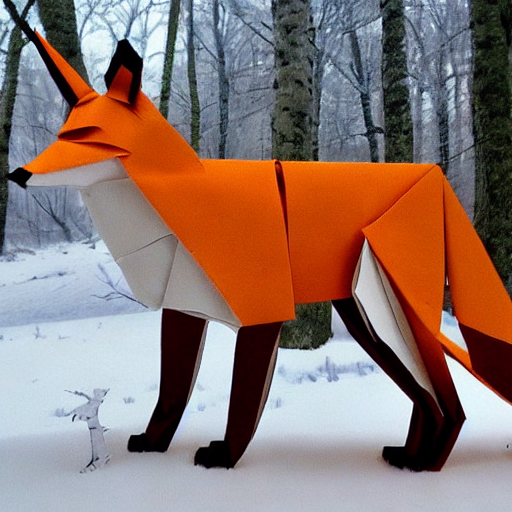

In [ ]:
image

## Glide

## DALLE-2

Имплементация отсюда: https://github.com/lucidrains/DALLE2-pytorch

In [ ]:
!pip install dalle2_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from dalle2_pytorch import DALLE2, DiffusionPriorNetwork, DiffusionPrior, Unet, Decoder, CLIP

clip = CLIP(
    dim_text = 512,
    dim_image = 512,
    dim_latent = 512,
    num_text_tokens = 49408,
    text_enc_depth = 6,
    text_seq_len = 256,
    text_heads = 8,
    visual_enc_depth = 6,
    visual_image_size = 256,
    visual_patch_size = 32,
    visual_heads = 8
).cuda()

# mock data

text = torch.randint(0, 49408, (4, 256)).cuda()
images = torch.randn(4, 3, 256, 256).cuda()

# train

loss = clip(
    text,
    images,
    return_loss = True
)

loss.backward()

# do above for many steps ...

# prior networks (with transformer)

prior_network = DiffusionPriorNetwork(
    dim = 512,
    depth = 6,
    dim_head = 64,
    heads = 8
).cuda()

diffusion_prior = DiffusionPrior(
    net = prior_network,
    clip = clip,
    timesteps = 1000,
    sample_timesteps = 64,
    cond_drop_prob = 0.2
).cuda()

loss = diffusion_prior(text, images)
loss.backward()

# do above for many steps ...

# decoder (with unet)

unet1 = Unet(
    dim = 128,
    image_embed_dim = 512,
    text_embed_dim = 512,
    cond_dim = 128,
    channels = 3,
    dim_mults=(1, 2, 4, 8),
    cond_on_text_encodings = True    # set to True for any unets that need to be conditioned on text encodings
).cuda()

unet2 = Unet(
    dim = 16,
    image_embed_dim = 512,
    cond_dim = 128,
    channels = 3,
    dim_mults = (1, 2, 4, 8, 16)
).cuda()

decoder = Decoder(
    unet = (unet1, unet2),
    image_sizes = (128, 256),
    clip = clip,
    timesteps = 100,
    image_cond_drop_prob = 0.1,
    text_cond_drop_prob = 0.5
).cuda()

for unet_number in (1, 2):
    loss = decoder(images, text = text, unet_number = unet_number) # this can optionally be decoder(images, text) if you wish to condition on the text encodings as well, though it was hinted in the paper it didn't do much
    loss.backward()

# do above for many steps

dalle2 = DALLE2(
    prior = diffusion_prior,
    decoder = decoder
)

images = dalle2(
    ['cute puppy chasing after a squirrel'],
    cond_scale = 2. # classifier free guidance strength (> 1 would strengthen the condition)
)

# save your image (in this example, of size 256x256)

sampling loop time step:   0%|          | 0/63 [00:00<?, ?it/s]

0it [00:00, ?it/s]

sampling loop time step:   0%|          | 0/100 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
from PIL import Image
import torchvision.transforms as T

transform = T.ToPILImage()
img = transform(images[0][0])
img.show()

In [ ]:
images[0][0].size()

torch.Size([256, 256])